In [1]:
import tensorflow as tf
import keras

(x_train,y_train),(x_test,y_test) = keras.datasets.boston_housing.load_data()

Using TensorFlow backend.


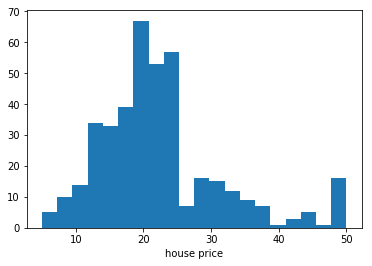

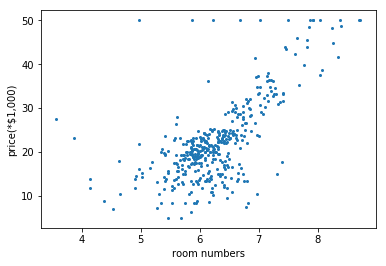

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(y_train,bins=20)
plt.xlabel("house price")
plt.show()

plt.plot(x_train[:,5],y_train,"o",markersize=2)
plt.xlabel("room numbers")
plt.ylabel("price(*$1,000)")
plt.show()

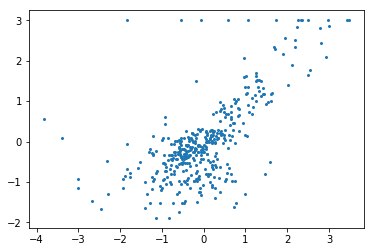

In [3]:
x_train_mean = x_train.mean(axis = 0) #各要素の平均値 axis = 0:縦方向
x_train_std = x_train.std(axis = 0) #標準偏差

y_train_mean = y_train.mean()
y_train_std = y_train.std()


x_train = (x_train - x_train_mean)/x_train_std
y_train =(y_train - y_train_mean)/y_train_std

x_test = (x_test - x_train_mean)/x_train_std
y_test =(y_test - y_train_mean)/y_train_std

plt.plot(x_train[:,5],y_train,"o",markersize=2)
plt.show()




In [4]:
LOG_DIR = "./logs/3_6_3"
# 指定したディレクトリがあれば削除し、再作成
if (tf.gfile.Exists(LOG_DIR)):
    tf.gfile.DeleteRecursively(LOG_DIR)
tf.gfile.MakeDirs(LOG_DIR)


x = tf.placeholder(tf.float32,(None,13),name = "x")
y = tf.placeholder(tf.float32,(None,1),name = "y")
a = tf.placeholder(tf.float32,name = "a")

w = tf.Variable(tf.random_normal((13,1))) #ランダムな値で初期化
pred = tf.matmul(x,w) #予測モデル



In [5]:
loss = tf.reduce_mean((y - pred)**2)#損失関数の定義　二乗誤差 reduce_meanは平均値を求める関数
loss_summary = tf.summary.scalar('loss', loss)

t_loss = tf.reduce_mean((y - pred)**2)
test_loss_summary=tf.summary.scalar('test_loss', t_loss)


optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1) #勾配法で最適化　歩幅=0.1

train_step = optimizer.minimize(loss,var_list = [w]) #wを最適化

train_loss = 38.72095489501953,test_loss = 12.643484115600586
train_loss = 10.183765411376953,test_loss = 8.153555870056152
train_loss = 6.594297409057617,test_loss = 6.061305522918701
train_loss = 4.965112209320068,test_loss = 4.607731342315674
train_loss = 3.848255157470703,test_loss = 3.5754334926605225
train_loss = 3.040095806121826,test_loss = 2.835106134414673
train_loss = 2.4460785388946533,test_loss = 2.297691822052002
train_loss = 2.0041744709014893,test_loss = 1.9043017625808716
train_loss = 1.67168128490448,test_loss = 1.613156795501709
train_loss = 1.418731689453125,test_loss = 1.3953381776809692
train_loss = 1.2241922616958618,test_loss = 1.2304176092147827
train_loss = 1.0729498863220215,test_loss = 1.103954553604126
train_loss = 0.9540963768959045,test_loss = 1.0056582689285278
train_loss = 0.8596875667572021,test_loss = 0.9281578063964844
train_loss = 0.783890962600708,test_loss = 0.8661394119262695
train_loss = 0.7223904132843018,test_loss = 0.815750777721405
train_los

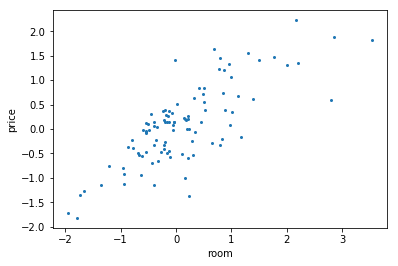

In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())#変数の初期化
    
    test_loss = 0
    
    
    #merged = tf.summary.merge_all()

    summary_writer = tf.summary.FileWriter(LOG_DIR,sess.graph)
    
    

    for step in range(100):
        summary,train_loss, _ = sess.run([loss_summary,loss, train_step],feed_dict = {x:x_train, y:y_train.reshape((-1,1))} ) #train_stepの戻り値はNoneなので_に格納
        
        summary1,test_loss = sess.run([test_loss_summary,t_loss],feed_dict={x:x_test, y:y_test.reshape((-1,1))})
        
        
        summary_writer.add_summary(summary, step)
        summary_writer.add_summary(summary1, step)
        
        
        print("train_loss = {},test_loss = {}".format(train_loss,test_loss))
    
    pred_ = sess.run(pred,feed_dict ={x:x_test})
    
    
    #print(pred_)
        
plt.plot(x_test[:,5],pred_,"o",markersize=2)
plt.xlabel("room")
plt.ylabel("price")
plt.show()
    
summary_writer.close()
    
        